<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

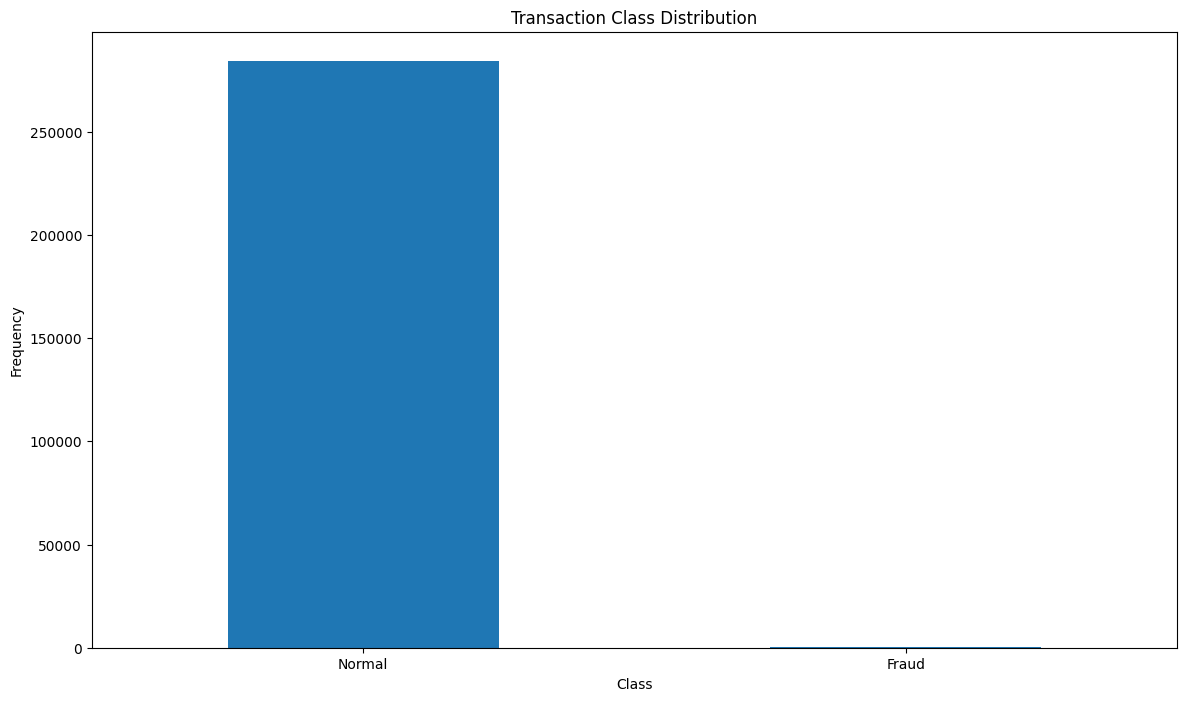

(492, 31) (284315, 31)


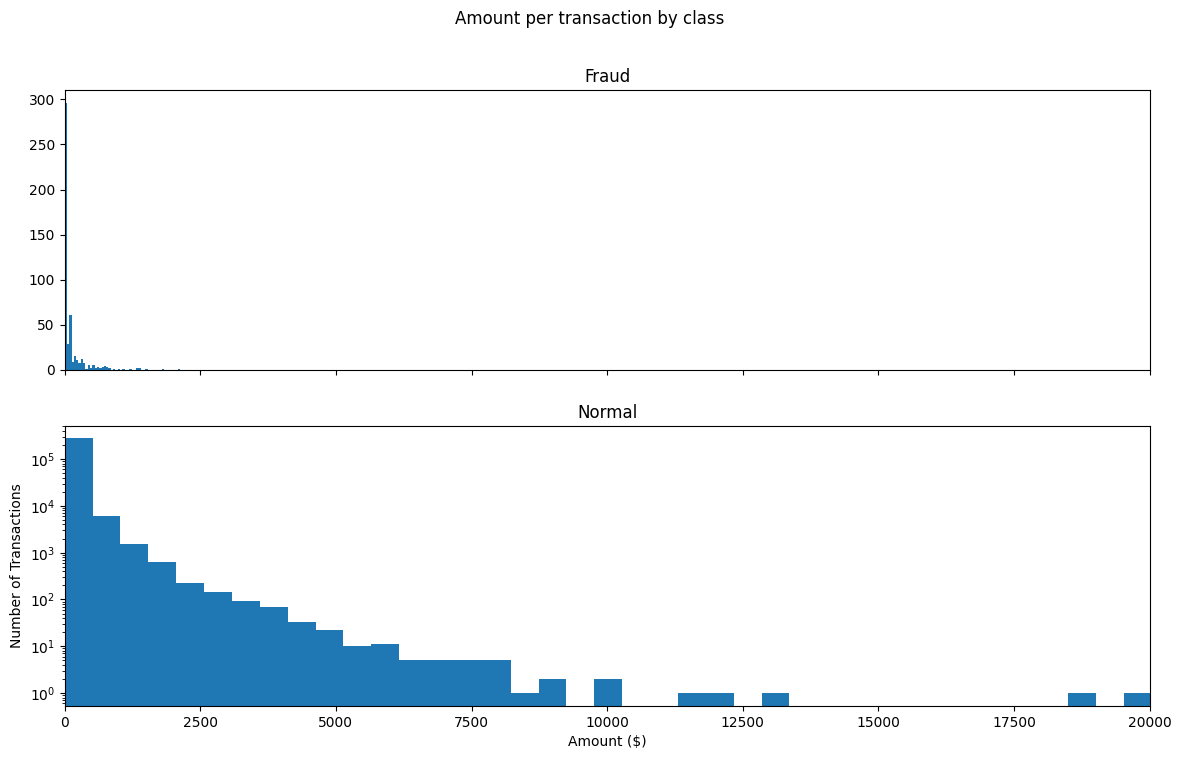

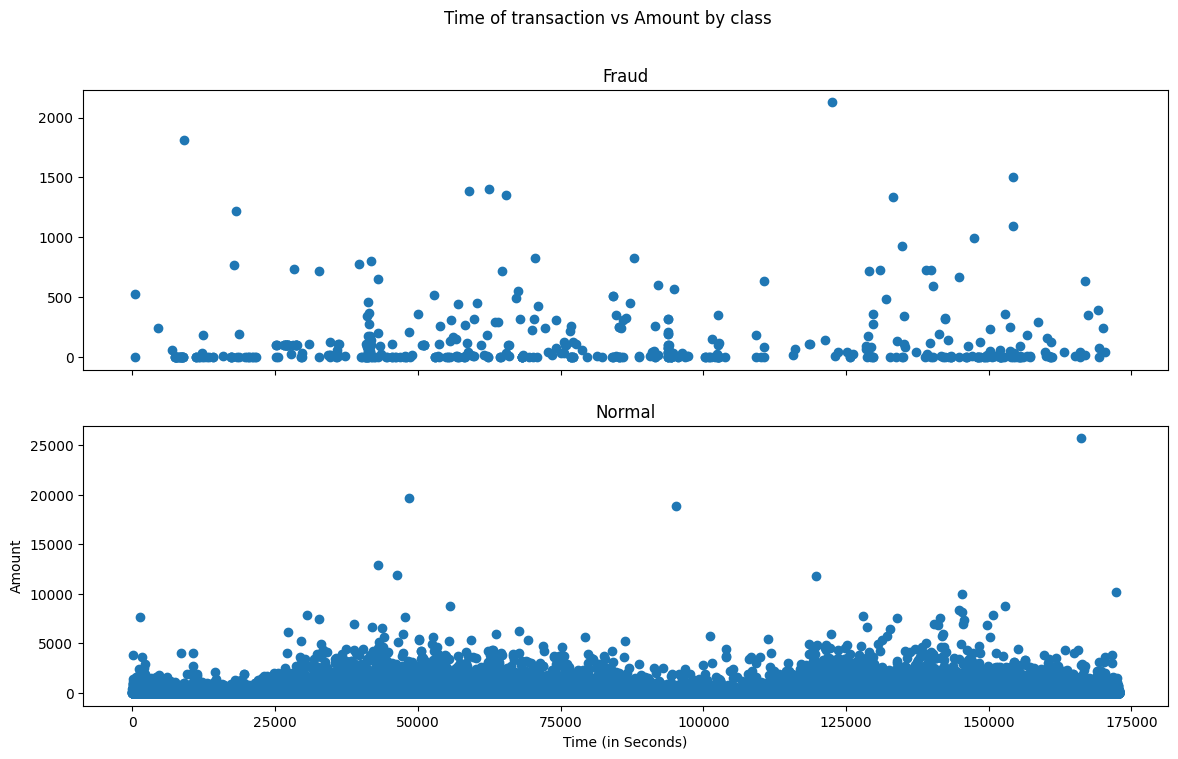

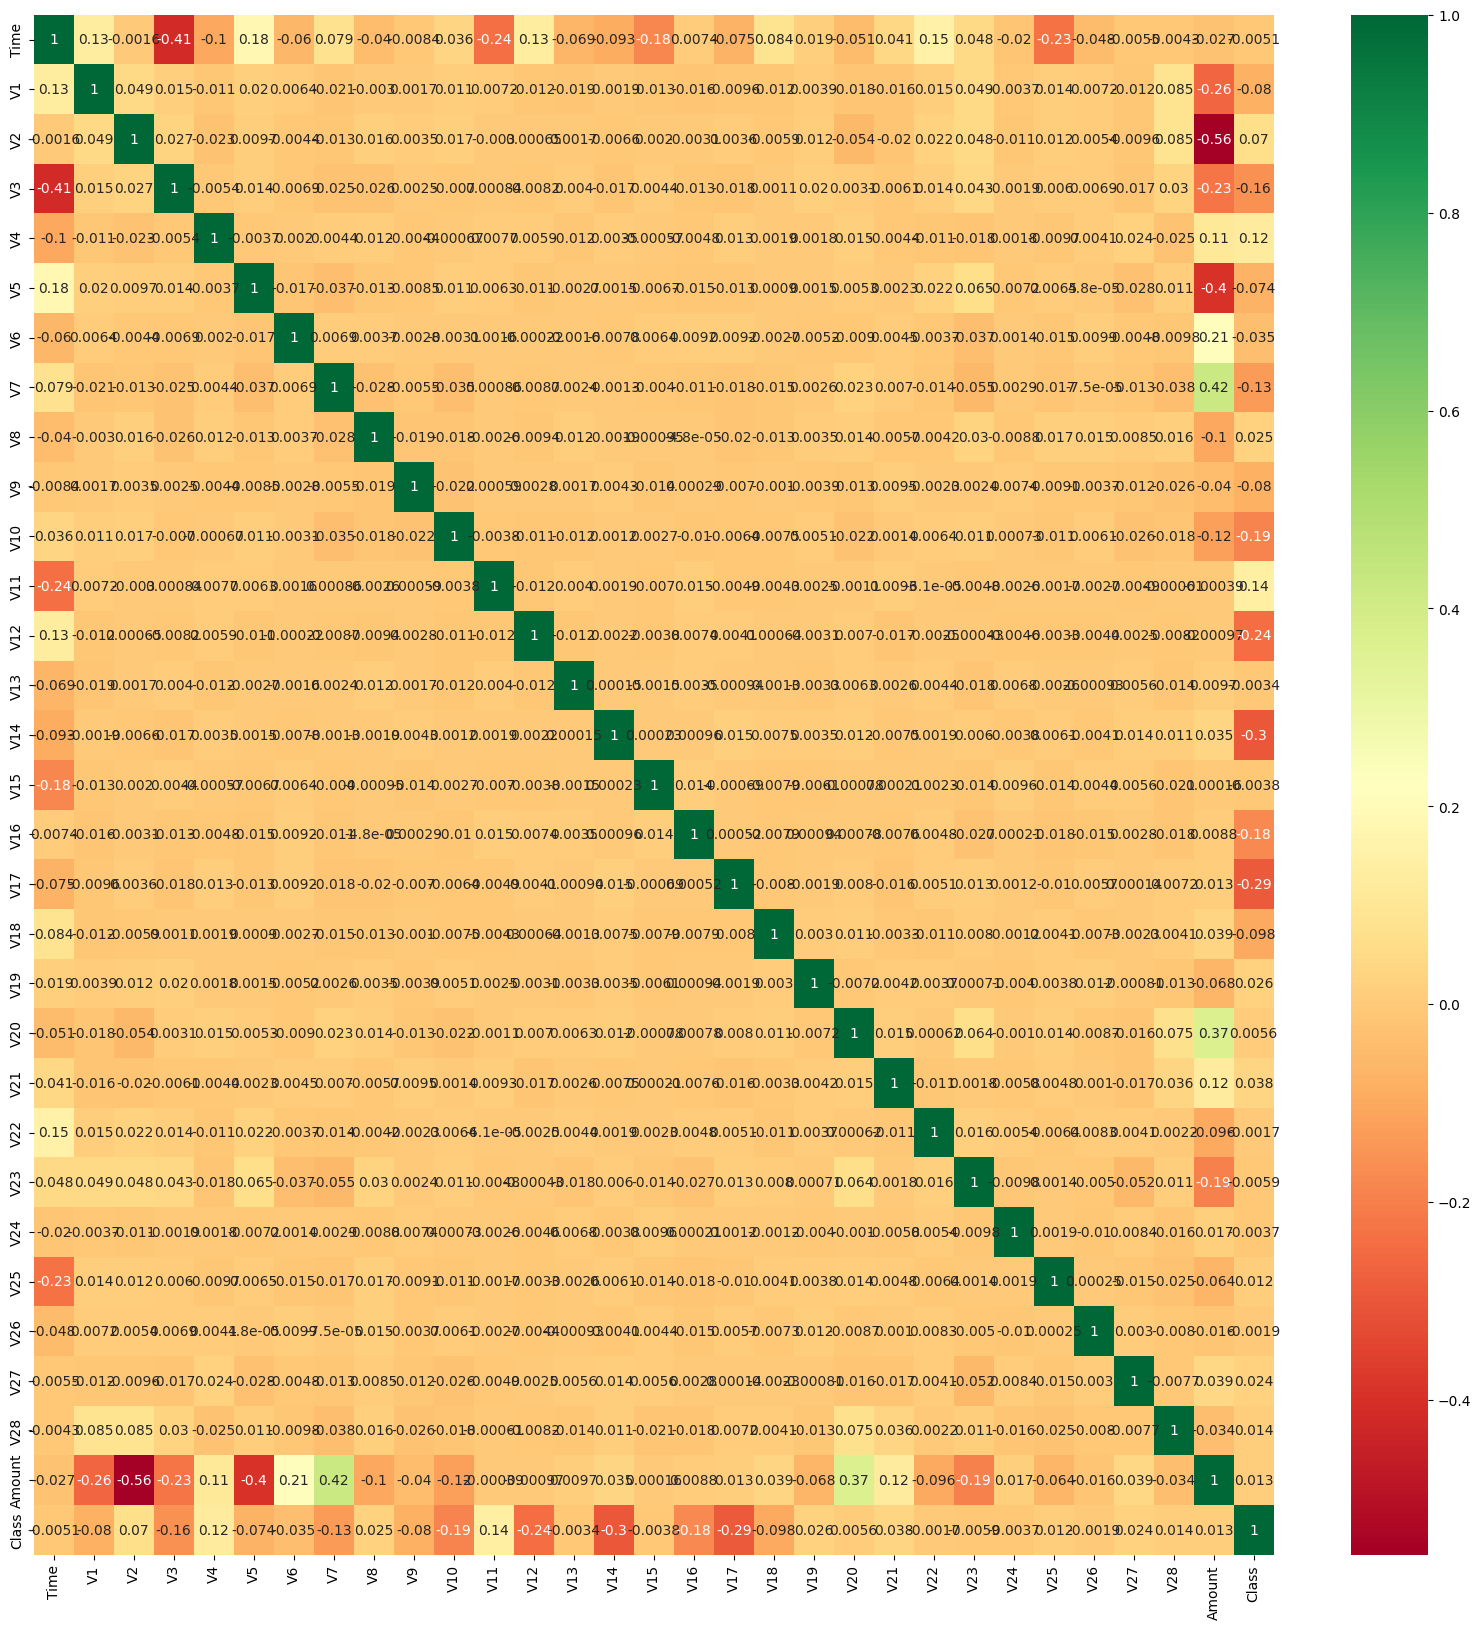

Isolation Forest Results:
Accuracy: 0.001579778830963665
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      5687
           1       0.00      0.90      0.00        10

    accuracy                           0.00      5697
   macro avg       0.00      0.30      0.00      5697
weighted avg       0.00      0.00      0.00      5697



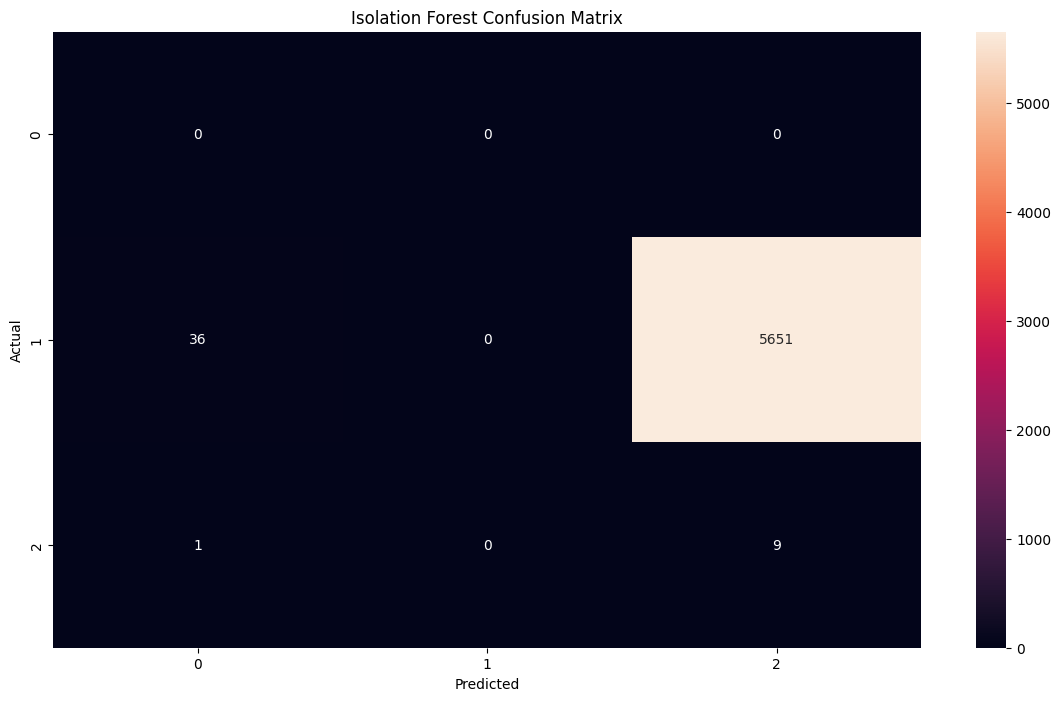

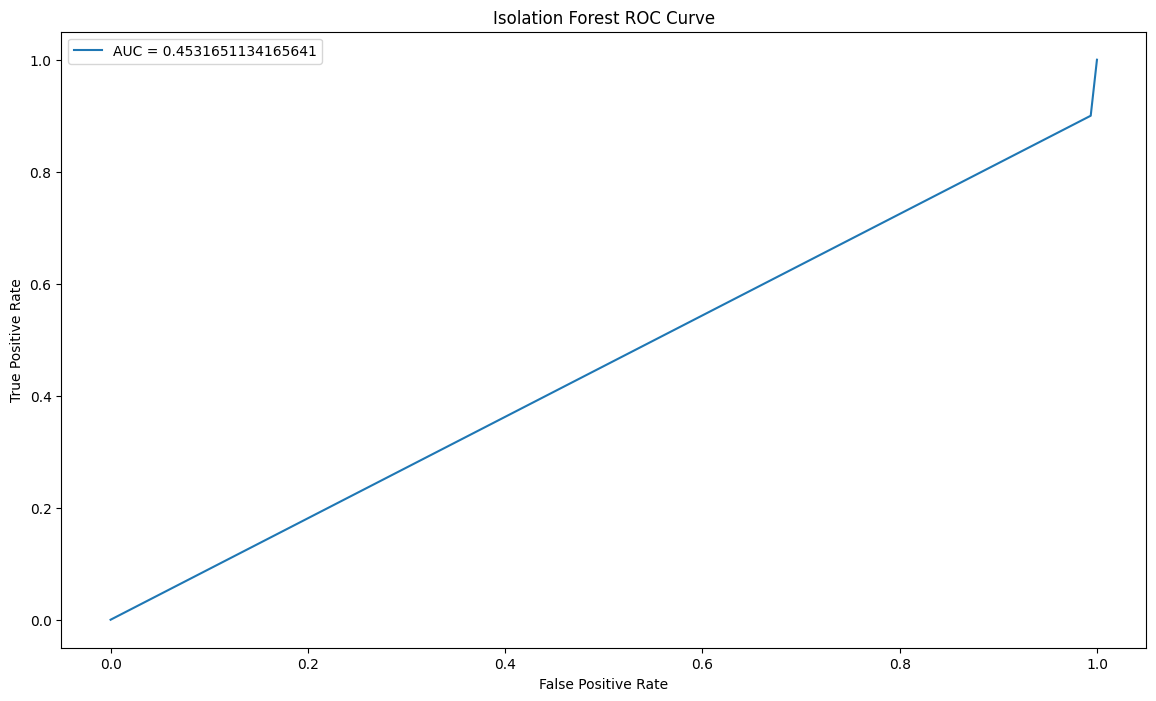

Local Outlier Factor Results:
Accuracy: 0.00175530981218185
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      5687
           1       0.00      1.00      0.00        10

    accuracy                           0.00      5697
   macro avg       0.00      0.33      0.00      5697
weighted avg       0.00      0.00      0.00      5697



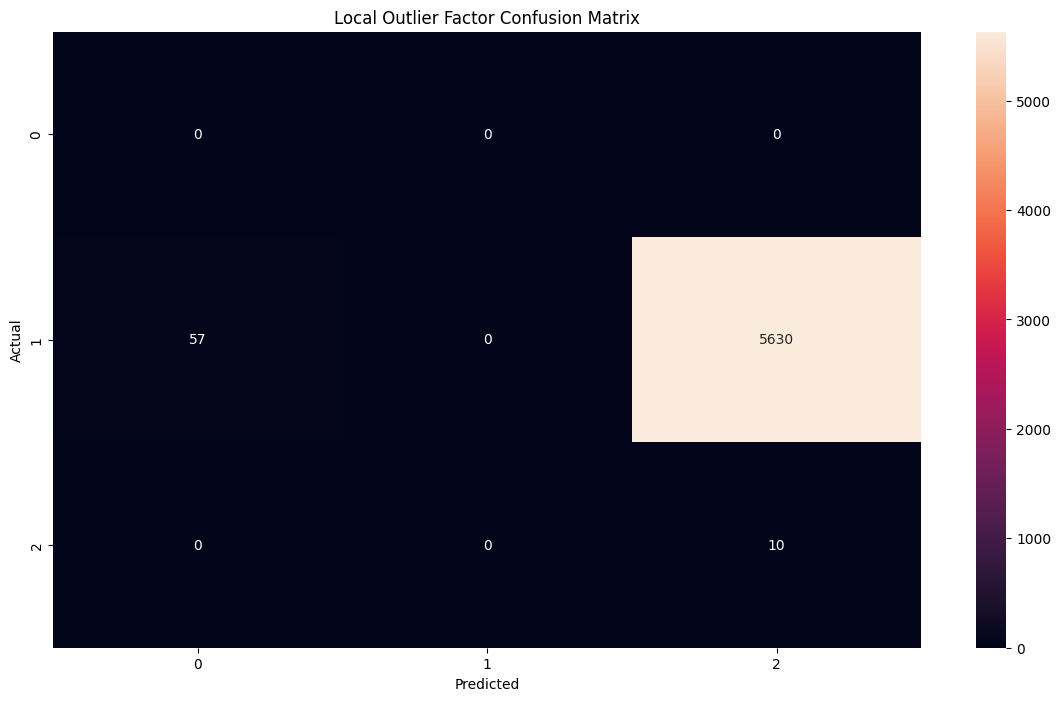

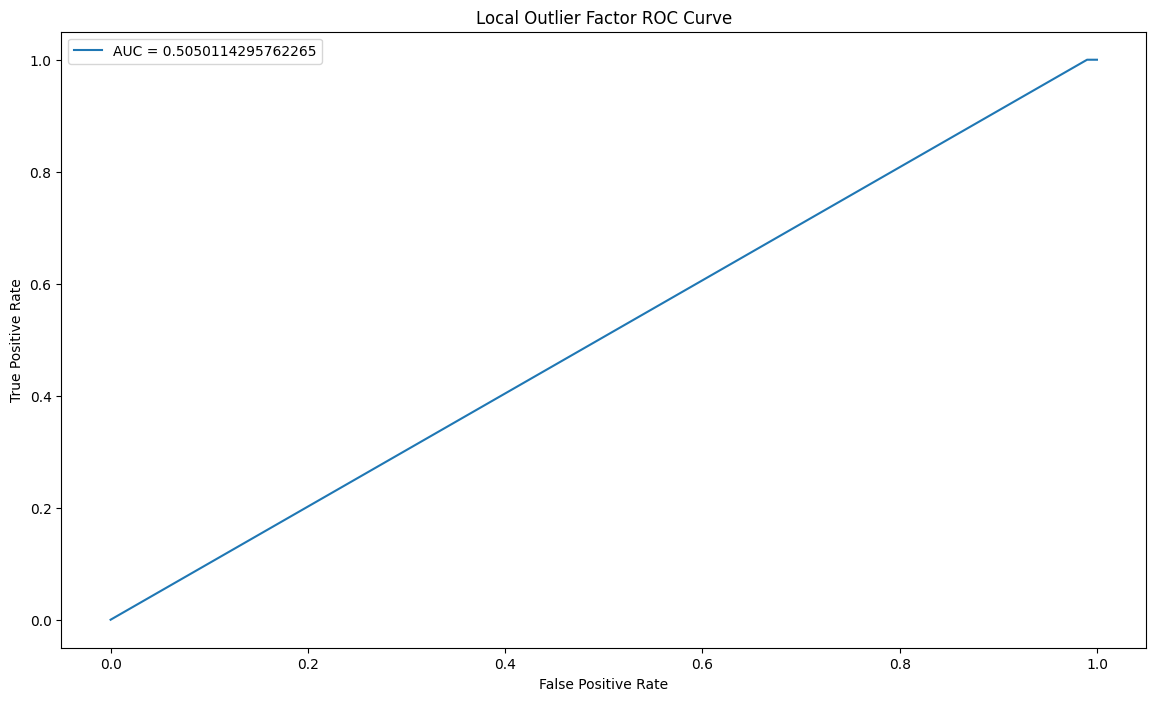

K-Nearest Neighbors Results:
Accuracy: 0.8601018079691065
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      5687
           1       0.00      0.10      0.00        10

    accuracy                           0.86      5697
   macro avg       0.50      0.48      0.46      5697
weighted avg       1.00      0.86      0.92      5697



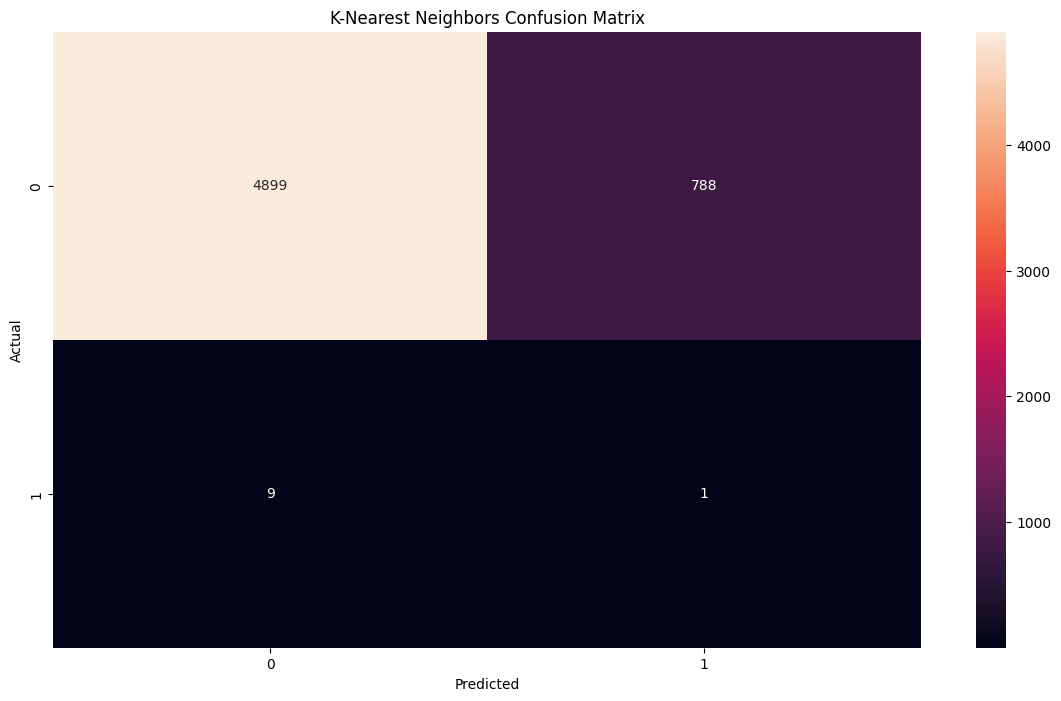

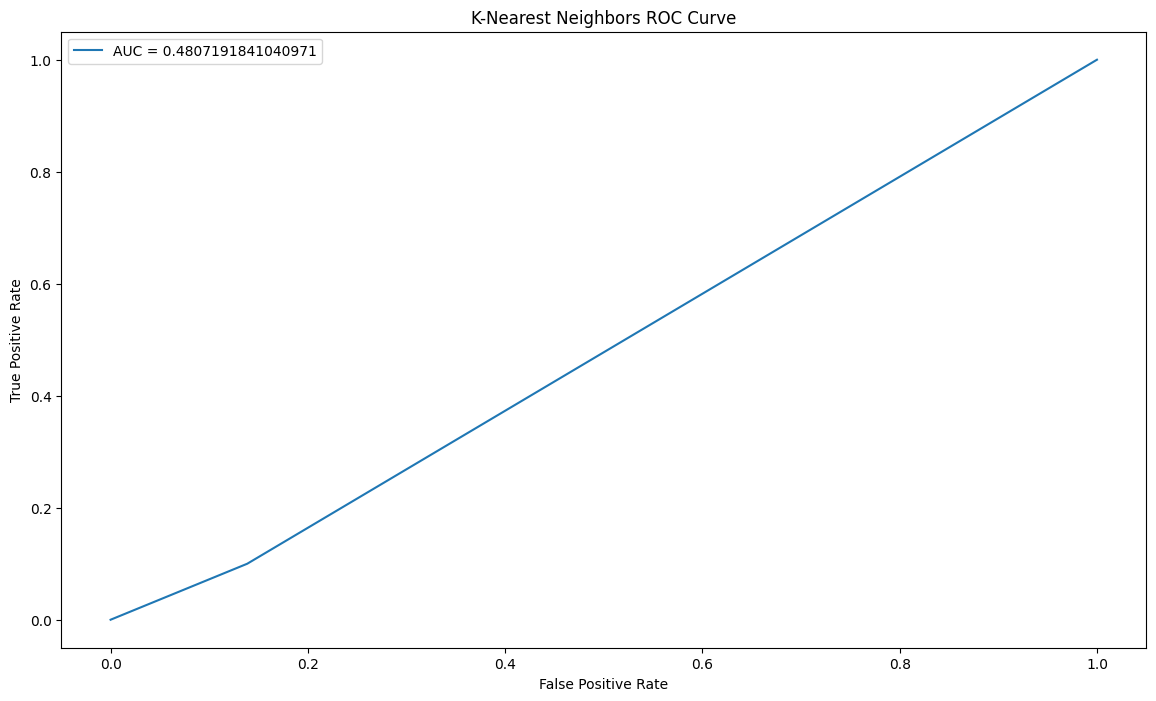

Support Vector Machine Results:
Accuracy: 0.9982446901878181
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5687
           1       0.00      0.00      0.00        10

    accuracy                           1.00      5697
   macro avg       0.50      0.50      0.50      5697
weighted avg       1.00      1.00      1.00      5697



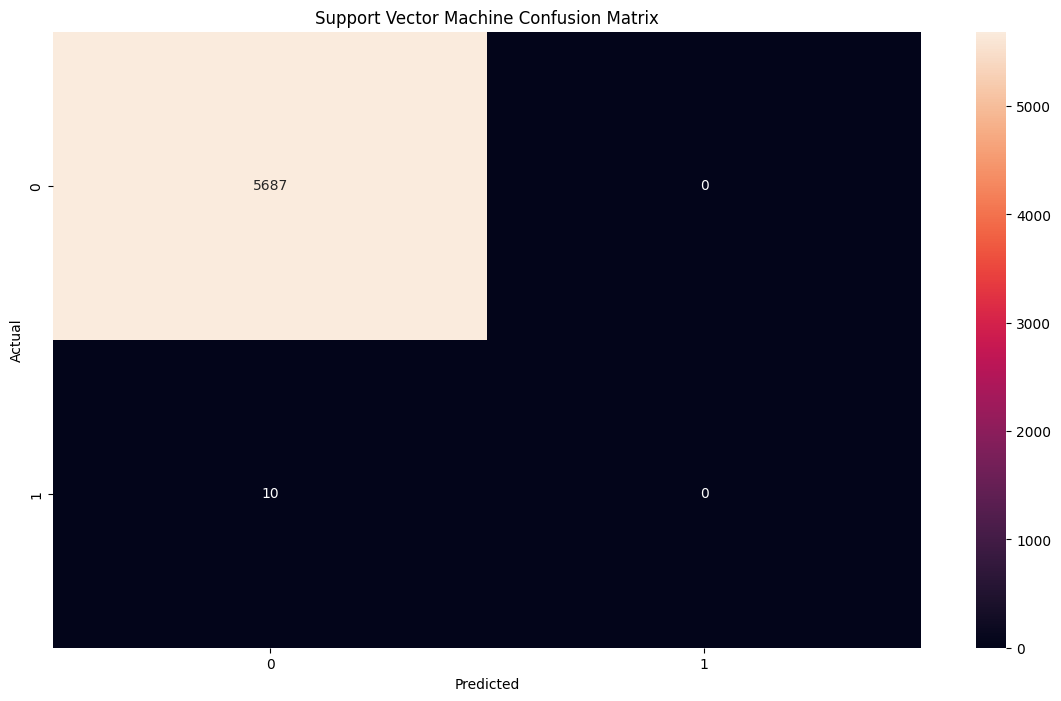

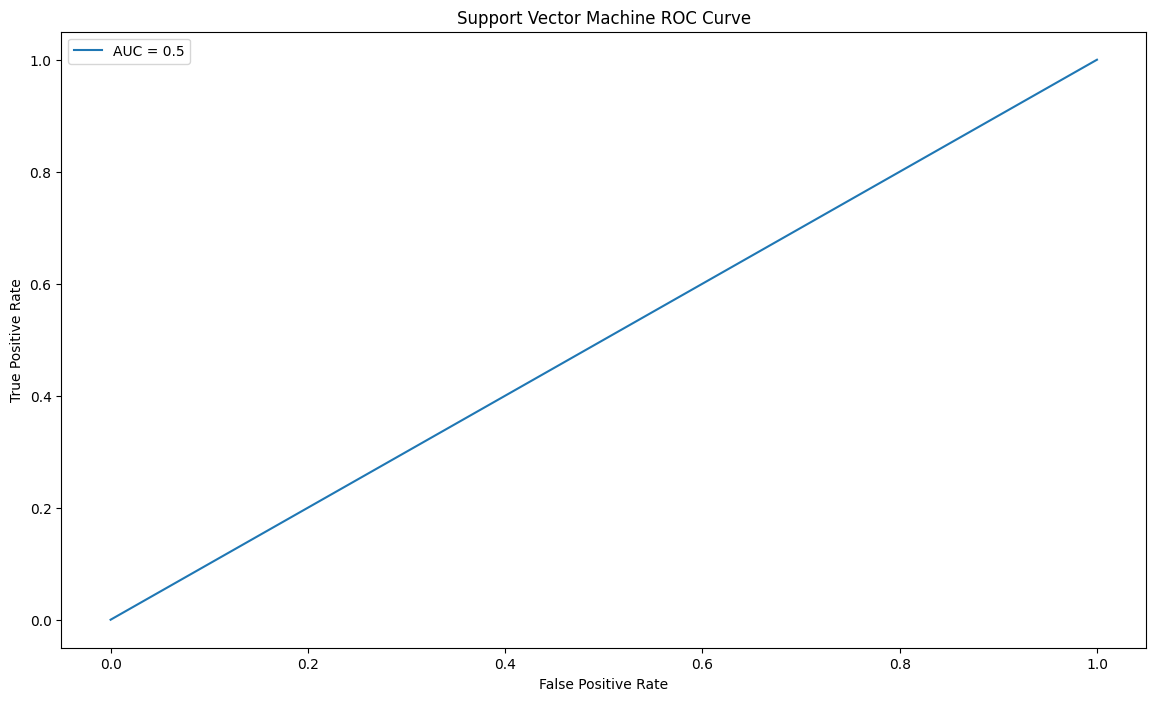


Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5687
           1       1.00      0.50      0.67        10

    accuracy                           1.00      5697
   macro avg       1.00      0.75      0.83      5697
weighted avg       1.00      1.00      1.00      5697

Random Forest Precision: 0.9991231160486755
Random Forest Recall: 0.9991223450939091


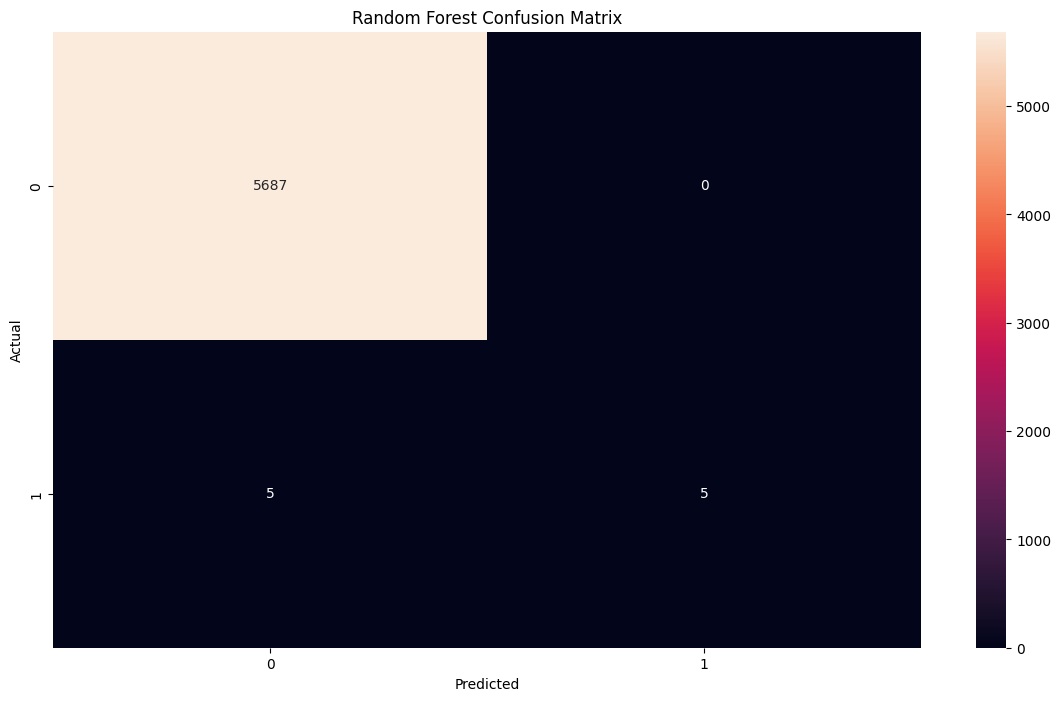

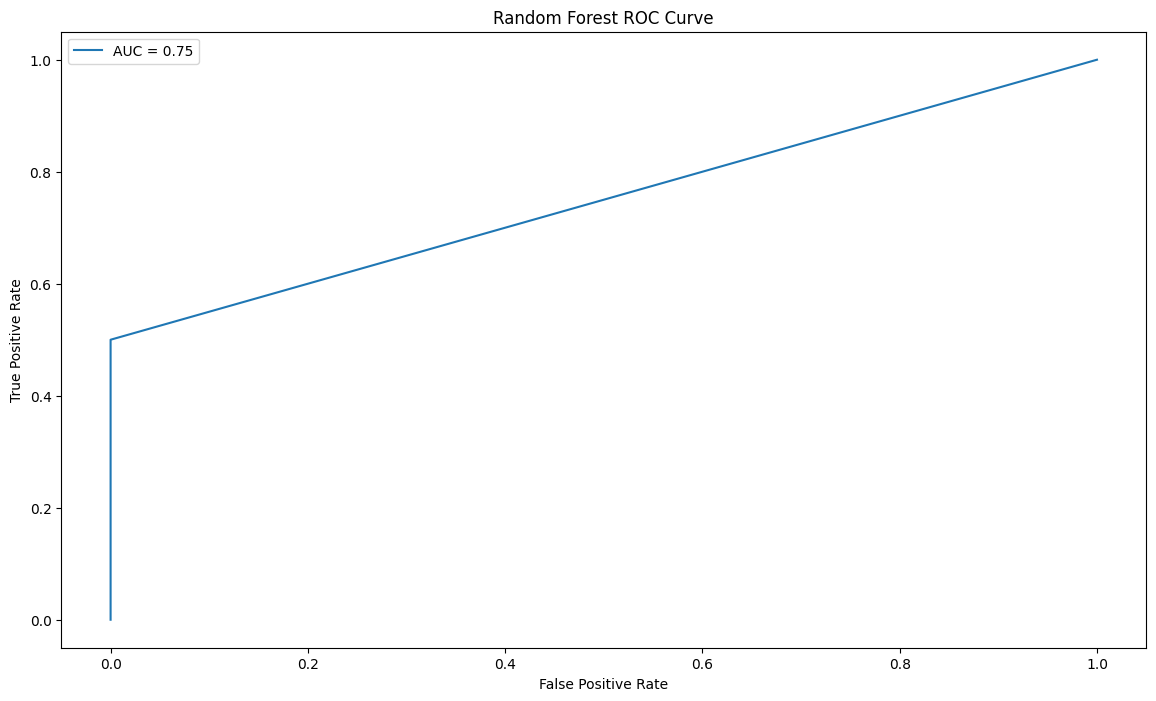

HMM Log Likelihood after scaling, PCA, and outlier removal: -308404.15412217774


C:\Users\antsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


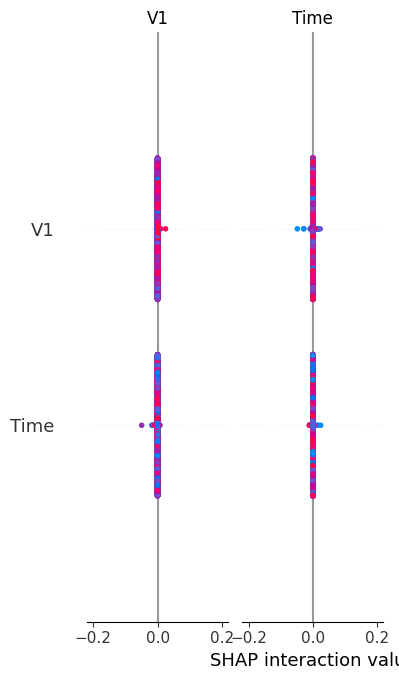

Digital Twin Simulation for Instance 0: Prediction - Normal
Digital Twin Simulation for Instance 1: Prediction - Normal
Digital Twin Simulation for Instance 2: Prediction - Normal
Digital Twin Simulation for Instance 3: Prediction - Normal
Digital Twin Simulation for Instance 4: Prediction - Normal

F1 Score Table:
                    Model  F1 Score
0        Isolation Forest  0.000006
1    Local Outlier Factor  0.000006
2     K-Nearest Neighbors  0.923157
3  Support Vector Machine  0.997368
4           Random Forest  0.998976


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler
import lime
from lime.lime_tabular import LimeTabularExplainer
import shap
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import warnings
from sklearn.exceptions import UndefinedMetricWarning


from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


data = pd.read_csv('creditcard.csv')


data.info()
data.isnull().values.any()


def calculate_cv(dataframe):
    mean = dataframe.mean()
    std_dev = dataframe.std()
    cv = (std_dev / mean) * 100
    cv_table = pd.DataFrame({'Predictor': dataframe.columns, 'Mean': mean, 'Standard Deviation': std_dev, 'Coefficient of Variation (%)': cv})
    return cv_table


predictors = data.drop(columns=['Class'])


cv_table = calculate_cv(predictors)
print("\nCoefficient of Variation (CV) Table:")
print(cv_table)


count_classes = data['Class'].value_counts(sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]
print(fraud.shape, normal.shape)


f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()


f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


data1 = data.sample(frac=0.1, random_state=1)
corrmat = data1.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.show()


columns = data1.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
X = data1[columns]
Y = data1[target]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)


smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train, y_train)


def plot_metrics(y_test, y_pred, clf_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"{clf_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label="AUC = " + str(roc_auc_score(y_test, y_pred)))
    plt.title(f"{clf_name} ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="best")
    plt.show()


f1_scores = {}


classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X), contamination=0.01, random_state=RANDOM_SEED),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=0.01),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', gamma=0.1, C=1.0),
}


for clf_name, clf in classifiers.items():
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_test)
    else:
        clf.fit(X_resampled, Y_resampled)
        y_pred = clf.predict(X_test)
    
    print(f"{clf_name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    f1_scores[clf_name] = f1

    
    plot_metrics(y_test, y_pred, clf_name)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

print("\nRandom Forest Classifier Results:")
print(classification_report(y_test, rf_y_pred, zero_division=0))


precision_rf = precision_score(y_test, rf_y_pred, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, rf_y_pred, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, rf_y_pred, average='weighted', zero_division=0)
f1_scores["Random Forest"] = f1_rf
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")


plot_metrics(y_test, rf_y_pred, "Random Forest")


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)


iso_forest = IsolationForest(contamination=0.01, random_state=RANDOM_SEED)
outliers = iso_forest.fit_predict(X_pca)


X_no_outliers = X_pca[outliers == 1]


hmm_model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=500)
hmm_model.fit(X_no_outliers)
log_likelihood = hmm_model.score(X_no_outliers)
print(f"HMM Log Likelihood after scaling, PCA, and outlier removal: {log_likelihood}")


explainer = LimeTabularExplainer(X_train.values, training_labels=y_train.values, feature_names=columns, class_names=LABELS, mode='classification')


exp = explainer.explain_instance(X_test.iloc[0].values, rf_clf.predict_proba, num_features=5)
exp.show_in_notebook()


explainer_shap = shap.TreeExplainer(rf_clf)
shap_values = explainer_shap.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


for i in range(5): 
    real_time_data = X_test.iloc[[i]]  
    prediction = rf_clf.predict(real_time_data)
    print(f"Digital Twin Simulation for Instance {i}: Prediction - {LABELS[prediction[0]]}")


f1_scores_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
print("\nF1 Score Table:")
print(f1_scores_df)
